In [71]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from datetime import datetime
%matplotlib inline

In [2]:
cols = [0, 3, 7]
data = pd.read_csv('UofS_access_log', encoding='cp1251', sep=' ', 
                   header=None, usecols=cols, error_bad_lines=False)

Проверим, что выкинули не очень много строчек с полезными данными:

In [3]:
size = 2408625 # Число строк в оригинальном файле
print('Доля удаленных строк: ', (size - data.size / len(data.columns)) / size)

Доля удаленных строк:  0.0


Так как эта доля много меньше единицы, то можем продолжать.

In [4]:
data.rename(columns={0:'host', 3:'date', 7:'bytes'}, inplace=True)

Проверим, что сейчас во всех строчках что-то написано (т.е. что данные корректны и больше ничего не надо удалять)

In [5]:
rows_number = int(data.size / 3)

In [6]:
data.loc[data.date.str.contains('\[../.*./....:..:..:..') == False]

,host,date,bytes
1229616,maz3.maz.net,[11/Oa67220.dial.tip.net,-0600]
1242666,129.186.123.55,[12/Oct/1995ag5881.usask.ca,-0600]
2099490,ppp-4.pbmo.net,Thomas,500
2099556,ppp-4.pbmo.net,Thomas,500
2099559,ppp-4.pbmo.net,Thomas,500


In [7]:
data = data.drop(1229616)
data = data.drop(1242666)
data = data.drop(2099490)
data = data.drop(2099556)
data = data.drop(2099559)

Удалили все плохие строчки. Их всего пять, то есть они не сильно увеличат долю удаленных данных.

In [8]:
data

,host,date,bytes
0,202.32.92.47,[01/Jun/1995:00:00:59,271
1,ix-or7-27.ix.netcom.com,[01/Jun/1995:00:02:51,205908
2,ram0.huji.ac.il,[01/Jun/1995:00:05:44,271
3,eagle40.sasknet.sk.ca,[01/Jun/1995:00:08:06,1116
4,eagle40.sasknet.sk.ca,[01/Jun/1995:00:08:19,49649
5,cdc8g5.cdc.polimi.it,[01/Jun/1995:00:11:03,461
6,freenet2.carleton.ca,[01/Jun/1995:00:16:54,5759
7,red.weeg.uiowa.edu,[01/Jun/1995:00:18:14,461
8,interchg.ubc.ca,[01/Jun/1995:00:23:53,2460
9,interchg.ubc.ca,[01/Jun/1995:00:24:17,2570


Итак, можно проводить исследование.

In [9]:
indexes = list(range(rows_number))
indexes.remove(1229616)
indexes.remove(1242666)
indexes.remove(2099490)
indexes.remove(2099556)
indexes.remove(2099559)
indexes = np.array(indexes)
times = [datetime.strptime(data['date'][i], "[%d/%b/%Y:%H:%M:%S").timestamp() for i in indexes]

## Пуассоновский процесс

In [10]:
times = np.array(times)

corr_times = times - np.min(times) # Хотим, чтобы время начиналось с нуля

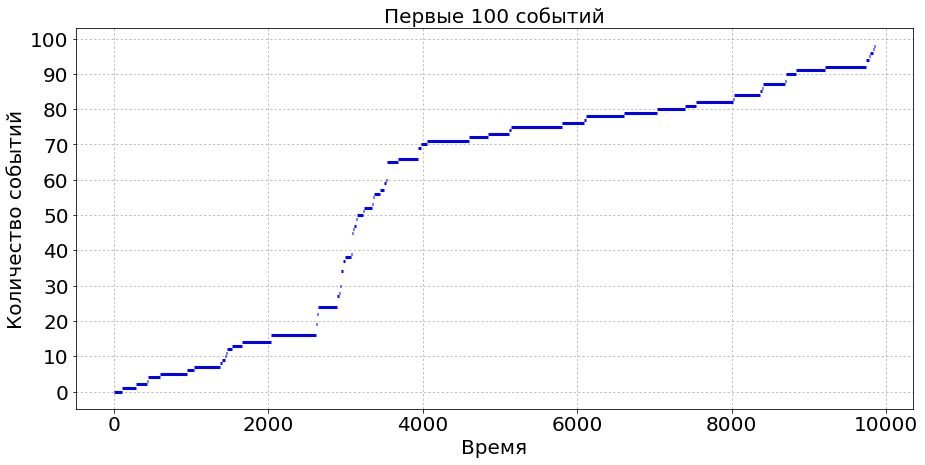

In [11]:
plt.figure(figsize=(15, 7))
for i in range(100 - 1):
    plt.hlines(i, corr_times[i], corr_times[i+1], lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, 101, 10), fontsize=20)

plt.title('Первые 100 событий',
          fontsize=20)
plt.xlabel('Время', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

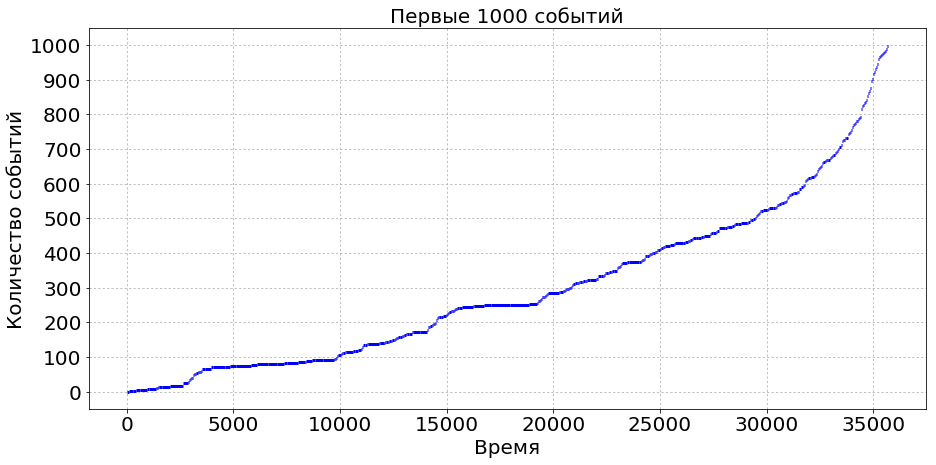

In [12]:
plt.figure(figsize=(15, 7))
for i in range(1000 - 1):
    plt.hlines(i, corr_times[i], corr_times[i+1], lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, 1001, 100), fontsize=20)

plt.title('Первые 1000 событий',
          fontsize=20)
plt.xlabel('Время', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

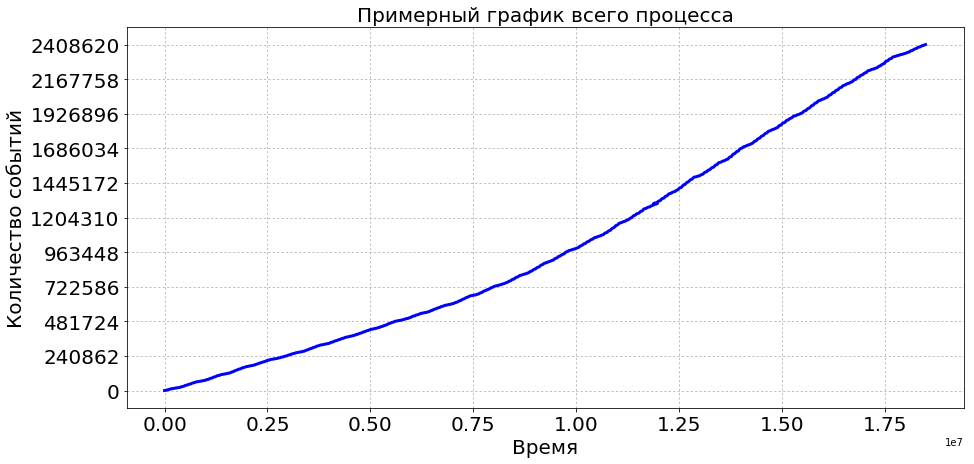

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(corr_times, range(len(corr_times)), lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, len(corr_times) + 1, int(len(corr_times) / 10)), fontsize=20)

plt.title('Примерный график всего процесса', fontsize=20)
plt.xlabel('Время', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

## Составной пуассоновский процесс

In [14]:
byte = [int(data['bytes'][i]) if data['bytes'][i] is not '-' else 0 for i in indexes]

In [15]:
xi = [0]
for i in range(100):
    xi.append(byte[i])
jumps = np.cumsum(xi)

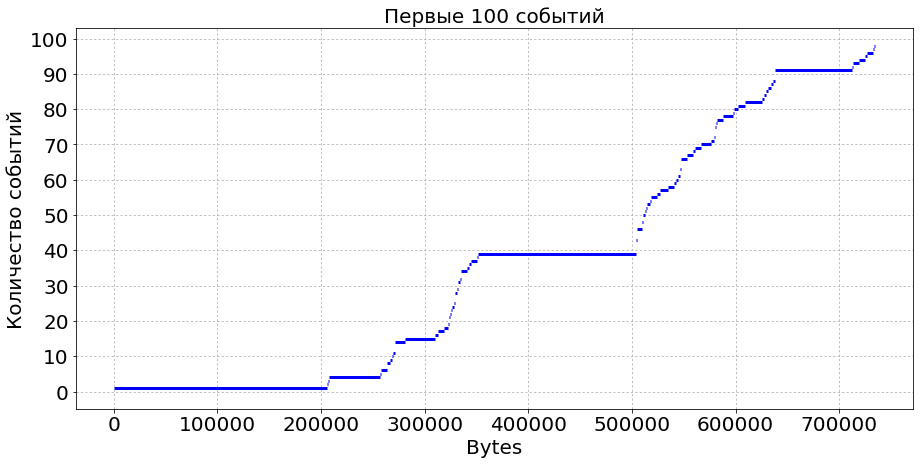

In [16]:
plt.figure(figsize=(15, 7))
for i in range(100 - 1):
    plt.hlines(i, jumps[i], jumps[i+1], lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, 101, 10), fontsize=20)

plt.title('Первые 100 событий',
          fontsize=20)
plt.xlabel('Bytes', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

In [17]:
xi = [0]
for i in range(1000):
    xi.append(byte[i])
jumps = np.cumsum(xi)

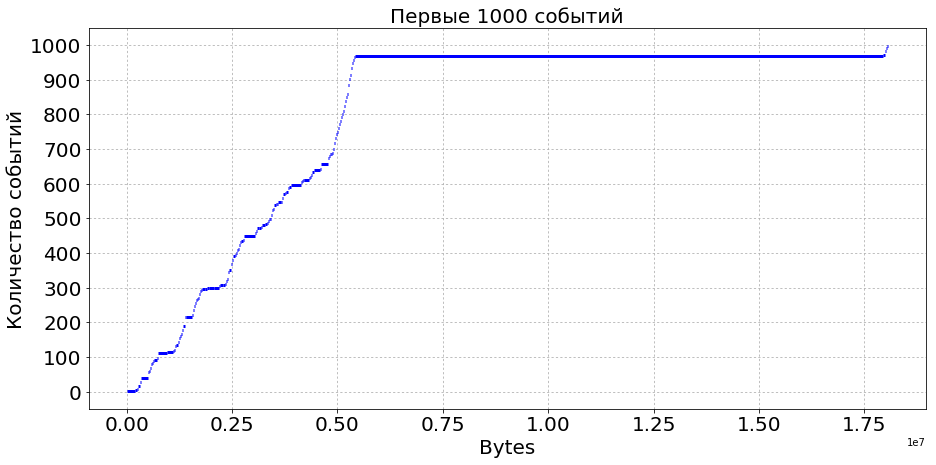

In [18]:
plt.figure(figsize=(15, 7))
for i in range(1000 - 1):
    plt.hlines(i, jumps[i], jumps[i+1], lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, 1001, 100), fontsize=20)

plt.title('Первые 1000 событий',
          fontsize=20)
plt.xlabel('Bytes', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

In [19]:
jumps = np.cumsum(byte)

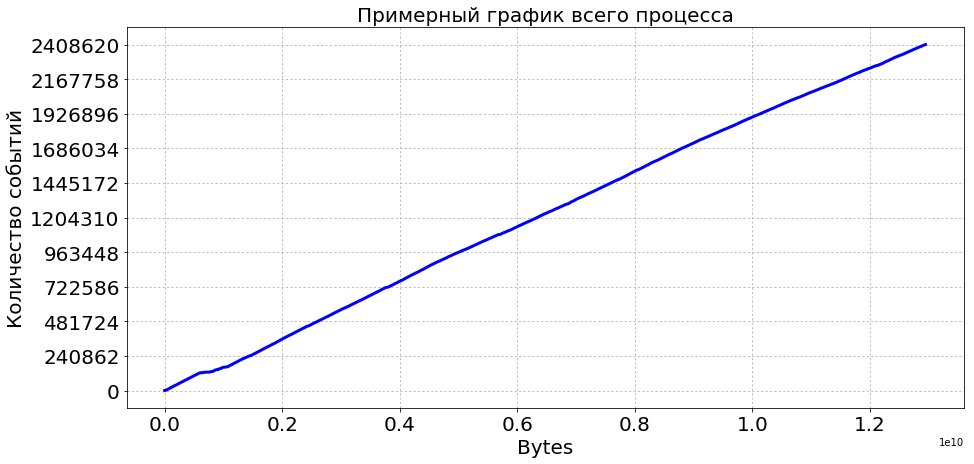

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(jumps, range(len(jumps)), lw=3, color='blue')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.yticks(range(0, len(corr_times) + 1, int(len(corr_times) / 10)), fontsize=20)

plt.title('Примерный график всего процесса',
          fontsize=20)
plt.xlabel('Bytes', fontsize=20)
plt.ylabel('Количество событий', fontsize=20)
plt.show()

## Проверка на однородность

Проверим, что критерий не отвергает самостоятельно сгенерированные пуассоновские процессы.

In [38]:
alpha = 0.05

In [39]:
T = 3600 # Один час
l = 1  # Интенсивность

S = 0
xi = [0]  # Тут будут случайные величины \xi_i. Ноль для удобства
while S < T:
    xi.append(sps.expon(scale=1/l).rvs())
    S += xi[-1]
jumps = np.cumsum(xi)  # Моменты скачков

In [40]:
real = np.histogram(jumps, bins=10)
K = len(real[0])
kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

print("p-value: ", round(kstest.pvalue, 5))
if kstest.pvalue > alpha:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')

p-value:  0.80329
Гипотеза не отвергается


In [41]:
T = 3600 * 24
l = 1  # интенсивность

S = 0
xi = [0]  # тут будут случайные величины \xi_i. Ноль для удобства
while S < T:
    xi.append(sps.expon(scale=1/l).rvs())
    S += xi[-1]
jumps = np.cumsum(xi)  # моменты скачков

In [42]:
real = np.histogram(jumps, bins=10)
K = len(real[0])
kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

print("p-value: ", round(kstest.pvalue, 5))
if kstest.pvalue > alpha:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')

p-value:  0.42625
Гипотеза не отвергается


In [43]:
T = 3600 * 24 * 7
l = 1  # интенсивность

S = 0
xi = [0]  # тут будут случайные величины \xi_i. Ноль для удобства
while S < T:
    xi.append(sps.expon(scale=1/l).rvs())
    S += xi[-1]
jumps = np.cumsum(xi)  # моменты скачков

In [44]:
real = np.histogram(jumps, bins=10)
K = len(real[0])
kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

print("p-value: ", round(kstest.pvalue, 5))
if kstest.pvalue > alpha:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')

p-value:  0.41276
Гипотеза не отвергается


Итак, на искусственных данных критерию работают хорошо. Проверим на однородность наши данные.

In [156]:
random_moment = [random.randint(0, len(corr_times)) for i in range(10)]
random_time = np.zeros(10, dtype=int)
for i in range(10):
    while corr_times[random_time[i]] < random_moment[i]:
        random_time[i] += 1
random_moment = np.array(random_moment)
random_time = np.array(random_time)

In [159]:
for j in range(10):
    xi = [corr_times[random_time[j]]]
    i = random_time[j] + 1
    
    while corr_times[i] < random_moment[j] + 3600 and i < len(corr_times):
        xi.append(corr_times[i])
        i += 1
    
    xi = np.array(xi)
    
    real = np.histogram(xi, bins=5)
    K = len(real[0])
    kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

    print("p-value: ", round(kstest.pvalue, 5))
    if kstest.pvalue > alpha:
        print('Гипотеза не отвергается')
    else:
        print('Гипотеза отвергается')

IndexError: index 5949 is out of bounds for axis 1 with size 10

In [141]:
xi = [corr_times[random_time]]
i = random_time + 1

while corr_times[i] < random_moment + 3600:
    xi.append(corr_times[i])
    i += 1
    
xi = np.array(xi)

In [142]:
xi

array([ 5809.,  6093.,  6114.,  6603.,  7029.,  7392.,  7536.,  8013.,
        8036.,  8372.,  8390.,  8405.,  8696.,  8706.,  8710.,  8832.])

In [143]:
real = np.histogram(xi, bins=5)
K = len(real[0])
kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

print("p-value: ", round(kstest.pvalue, 5))
if kstest.pvalue > alpha:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')

p-value:  0.16479
Гипотеза не отвергается


In [144]:
print(real[0], np.ones(K) * np.sum(real[0]) / K)

[3 1 3 2 7] [ 3.2  3.2  3.2  3.2  3.2]


In [106]:
xi = [corr_times[67]]
i = 1

while corr_times[i] < 7200:
    xi.append(corr_times[i])
    i += 1
    
xi = np.array(xi)

In [107]:
real = np.histogram(xi)
K = len(real[0])
kstest = sps.chisquare(real[0], np.ones(K) * np.sum(real[0]) / K)

print("p-value: ", round(kstest.pvalue, 5))
if kstest.pvalue > alpha:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')

p-value:  0.0
Гипотеза отвергается
